In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandasql import sqldf
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [2]:
#to read the datsets

# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# file_id = '1V_tKI0Vtd50lzXt77sWLBbpMM2ZCC0hQ'
# downloaded = drive.CreateFile({'id': file_id})
# downloaded.GetContentFile('deliveries.csv')

# file_id1 = '1HQsQxgXgY2KUGNbKv2ZGXPs_fjnvIZwY'
# downloaded1 = drive.CreateFile({'id': file_id1})
# downloaded1.GetContentFile('matches.csv')

<h2> PREPROCESSING </h2>

In [3]:
df = pd.read_csv('deliveries.csv')
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [4]:
df2 = pd.read_csv('matches.csv')
df2.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
df2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
# to find which stadiums are repeating with a slightly different name
l = sorted([i for i in df2['venue'].unique()])
print(l)

['ACA-VDCA Stadium', 'Barabati Stadium', 'Brabourne Stadium', 'Buffalo Park', 'De Beers Diamond Oval', 'Dr DY Patil Sports Academy', 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 'Dubai International Cricket Stadium', 'Eden Gardens', 'Feroz Shah Kotla', 'Feroz Shah Kotla Ground', 'Green Park', 'Himachal Pradesh Cricket Association Stadium', 'Holkar Cricket Stadium', 'IS Bindra Stadium', 'JSCA International Stadium Complex', 'Kingsmead', 'M Chinnaswamy Stadium', 'M. A. Chidambaram Stadium', 'M. Chinnaswamy Stadium', 'MA Chidambaram Stadium, Chepauk', 'Maharashtra Cricket Association Stadium', 'Nehru Stadium', 'New Wanderers Stadium', 'Newlands', 'OUTsurance Oval', 'Punjab Cricket Association IS Bindra Stadium, Mohali', 'Punjab Cricket Association Stadium, Mohali', 'Rajiv Gandhi International Stadium, Uppal', 'Rajiv Gandhi Intl. Cricket Stadium', 'Sardar Patel Stadium, Motera', 'Saurashtra Cricket Association Stadium', 'Sawai Mansingh Stadium', 'Shaheed Veer Narayan Singh Intern

In [8]:
# correcting stadium names
df2.replace('M. Chinnaswamy Stadium', 'M Chinnaswamy Stadium', inplace=True)
df2.replace('ACA-VDCA Stadium', 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', inplace=True)
df2.replace('Feroz Shah Kotla Ground', 'Feroz Shah Kotla', inplace=True)
df2.replace('Subrata Roy Sahara Stadium', 'Maharashtra Cricket Association Stadium', inplace=True)
df2.replace('M. A. Chidambaram Stadium', 'MA Chidambaram Stadium, Chepauk', inplace=True)
df2.replace('IS Bindra Stadium', 'Punjab Cricket Association IS Bindra Stadium, Mohali', inplace=True)
df2.replace('Punjab Cricket Association Stadium, Mohali', 'Punjab Cricket Association IS Bindra Stadium, Mohali', inplace=True)
df2.replace('Rajiv Gandhi Intl. Cricket Stadium', 'Rajiv Gandhi International Stadium, Uppal', inplace=True)
df2.replace('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 'Dr YS Rajasekhara Reddy ACA VDCA Cricket Stadium', inplace=True)

In [9]:
df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [10]:
df2.isnull().sum()
# the 4 NaN values in winner is because of No Result (due to rain)

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [11]:
for i in range(len(df2)):
    if df2["season"][i] == 2018 or df2["season"][i] == 2019:
        date = df2["date"][i].split("/")
        date = "20" + date[2] + "-" + date[1] + "-" + date[0]
        df2.loc[i,"date"] = date

In [12]:
matches_dict = list()
with open('data.json') as f:
  data = json.load(f)

for k in data.keys():
    for i in data[k].keys():
        winner = data[k][i]["winner"]
        date = data[k][i]["date"]
        venue = data[k][i]["venue"]
        team1 = data[k][i]["team1"]["name"]
        team2 = data[k][i]["team2"]["name"]
        players1 = data[k][i]["team1"]["players"]
        bowler_count_1 = 0
        for j in players1:
            if 'bowlingStyle' in j.keys():
                bowler_count_1 += 1
        batsman_count_1 = 11 - bowler_count_1
        players1 = data[k][i]["team2"]["players"]
        bowler_count_2 = 0
        for j in players1:
            if 'bowlingStyle' in j.keys():
                bowler_count_2 += 1
        batsman_count_2 = 11 - bowler_count_2
        matches_dict.append({"winner" : " ".join(winner.split(" ")[:-4]), \
                          "date": date[:10], "venue": venue, \
                          "team1" : team1, \
                          "bowler_count_1": bowler_count_1, \
                          "batsman_count_1": batsman_count_1, \
                          "team2" : team2, \
                          "bowler_count_2" : bowler_count_2, \
                          "batsman_count_2" : batsman_count_2})

In [13]:
new_data = pd.DataFrame(matches_dict)
new_data.replace('ACA-VDCA Stadium', 'Dr YS Rajasekhara Reddy ACA VDCA Cricket Stadium', inplace=True)
new_data.replace('DY Patil Stadium', 'Dr DY Patil Sports Academy', inplace=True)
new_data.replace('Feroz Shah Kotla Ground', 'Feroz Shah Kotla', inplace=True)
new_data.replace('HPCA Stadium', 'Himachal Pradesh Cricket Association Stadium', inplace=True)
new_data.replace('IS Bindra Stadium', 'Punjab Cricket Association IS Bindra Stadium, Mohali', inplace=True)
new_data.replace('JSCA International Cricket Stadium', 'JSCA International Stadium Complex', inplace=True)
new_data.replace('Jawaharlal Nehru Stadium', 'Nehru Stadium', inplace=True)
new_data.replace('M. Chinnaswamy Stadium', 'M Chinnaswamy Stadium', inplace=True)
new_data.replace('M. A. Chidambaram Stadium', 'MA Chidambaram Stadium, Chepauk', inplace=True)
new_data.replace("Maharashtra Cricket Association's International Stadium", 'Maharashtra Cricket Association Stadium', inplace=True)
new_data.replace('Rajiv Gandhi Intl. Cricket Stadium', 'Rajiv Gandhi International Stadium, Uppal', inplace=True)
new_data.replace('Sardar Patel Stadium', 'Sardar Patel Stadium, Motera', inplace=True)
new_data.replace('Zayed Cricket Stadium', 'Sheikh Zayed Stadium', inplace=True)
new_data.replace('Shaheed Veer Narayan Singh International Cricket Stadium', 'Shaheed Veer Narayan Singh International Stadium', inplace=True)
new_data.replace('Vidarbha Cricket Association Stadium', 'Vidarbha Cricket Association Stadium, Jamtha', inplace=True)
new_data

,winner,date,venue,team1,bowler_count_1,batsman_count_1,team2,bowler_count_2,batsman_count_2
0,Rajasthan Royals,2008-06-01,Dr DY Patil Sports Academy,Chennai Super Kings,4,7,Rajasthan Royals,4,7
1,Chennai Super Kings,2008-05-31,Wankhede Stadium,Chennai Super Kings,4,7,Kings XI Punjab,7,4
2,Rajasthan Royals,2008-05-30,Wankhede Stadium,Delhi Capitals,6,5,Rajasthan Royals,5,6
3,Kings XI Punjab,2008-05-28,"Punjab Cricket Association IS Bindra Stadium, ...",Kings XI Punjab,6,5,Rajasthan Royals,2,9
4,Mumbai Indians,2008-05-28,M Chinnaswamy Stadium,Royal Challengers Bangalore,6,5,Mumbai Indians,6,5
...,...,...,...,...,...,...,...,...,...
819,Mumbai Indians,2020-09-23,Sheikh Zayed Stadium,Kolkata Knight Riders,7,4,Mumbai Indians,7,4
820,Rajasthan Royals,2020-09-22,Sharjah Cricket Stadium,Rajasthan Royals,7,4,Chennai Super Kings,9,2
821,Royal Challengers Bangalore,2020-09-21,Dubai International Cricket Stadium,Sunrisers Hyderabad,11,0,Royal Challengers Bangalore,9,2
822,Match tied (Delhi Capitals,2020-09-20,Dubai International Cricket Stadium,Delhi Capitals,7,4,Kings XI Punjab,6,5


In [14]:
player_details = pd.DataFrame({})
for i in data.keys():
    for j in data[i].keys():
        y = pd.DataFrame(data[i][j]['team1']['players'])
        player_details = pd.concat([player_details, y])
player_details.drop_duplicates(inplace=True)
player_details.reset_index(inplace=True)
player_details

,index,fullName,shortName,nationality,dateOfBirth,rightArmedBowl,rightHandedBat,bowlingStyle
0,0,Parthiv Patel,P Patel,Indian,1985-03-09,False,False,NaN
1,1,Vidyut Sivaramakrishnan,V Sivaramakrishnan,Indian,1981-12-03,False,False,ORTHODOX
2,2,Suresh Raina,S Raina,Indian,1986-11-27,True,False,NaN
3,3,Albie Morkel,A Morkel,South African,1981-06-10,False,False,NaN
4,4,MS Dhoni,MS Dhoni,Indian,1981-07-07,True,True,MEDIUM_SEAM
...,...,...,...,...,...,...,...,...
542,5,Alex Carey,A Carey,Australian,1991-08-27,False,False,NaN
543,10,Tushar Deshpande,T Deshpande,Indian,1995-05-15,False,True,NaN
544,2,Simran Singh,S Singh,Indian,2000-08-10,True,True,NaN
545,1,Yashasvi Jaiswal,Y Jaiswal,Indian,2001-12-28,False,False,MEDIUM_SEAM


In [15]:
df2[df2.result=='tie']
# checking number of tied matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
33,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
125,126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
189,190,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
387,388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
400,401,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN
475,476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN
535,536,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi,NaN
705,11146,2019,Delhi,2019-03-30,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,tie,0,Delhi Capitals,0,0,P Shaw,Feroz Shah Kotla,Anil Dandekar,Nitin Menon,Marais Erasmus
746,11342,2019,Mumbai,2019-05-02,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan,Nanda Kishore


In [16]:
abc= df[df['is_super_over']==1].groupby(by='match_id').count()
print(abc)
#number of superovers played (=7, but there were 9 tied matches)
#Further investigation has to be performed, we can see that match ID 11146 and 11342 have is_super_over=0 in inning=3 and 4

          inning  batting_team  bowling_team  over  ball  batsman  \
match_id                                                            
34            13            13            13    13    13       13   
126           11            11            11    11    11       11   
190            9             9             9     9     9        9   
388           13            13            13    13    13       13   
401           12            12            12    12    12       12   
476           12            12            12    12    12       12   
536           11            11            11    11    11       11   

          non_striker  bowler  is_super_over  wide_runs  bye_runs  \
match_id                                                            
34                 13      13             13         13        13   
126                11      11             11         11        11   
190                 9       9              9          9         9   
388                13      13    

In [17]:
df['inning'].unique()
#innings=5 is wrong

array([1, 2, 3, 4, 5], dtype=int64)

In [18]:
df[((df['inning']==3)|(df['inning']==4)|(df['inning']==5))].groupby(by='inning').count()
#there are 8 balls bowled with inning = 5, should be the ones that are missing with is_super_over=1

,match_id,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
inning,,,,,,,,,,,,,,,,,,,,
3,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,9,9,6
4,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,5,5,2
5,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,0,0,0


In [19]:
for i in range(df.shape[0]):
  if df.iloc[i, 1]==3:
    df.iloc[i, 9]=1  # cleaning: inning=3, is_super_over is made as 1
  elif df.iloc[i,1]==5:
    df.iloc[i,1]=4  # cleaning: inning=5 is made 4

In [20]:
sorted(list(df2.team1.unique()))

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

<h2> VISUALISATION </h2>

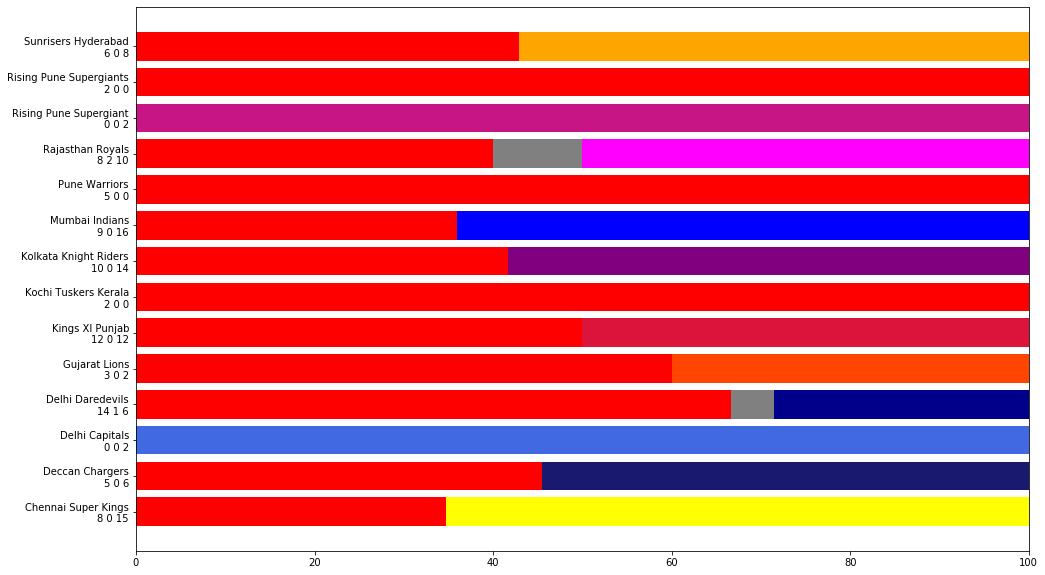

In [21]:
#Visualization 1- Head to head analysis of teams
h2h = dict()
def add_to_h2h(team1, team2, winner):
  if team1 in h2h.keys():
    if team2 in h2h[team1]:
      if winner==team1:
        h2h[team1][team2][0]+=1
      elif winner==team2:
        h2h[team1][team2][2]+=1
      else:
        h2h[team1][team2][1]+=1
    else:
      if winner==team1:
        h2h[team1][team2]=[1,0,0]
      elif winner==team2:
        h2h[team1][team2]=[0,0,1]
      else:
        h2h[team1][team2]=[0,1,0]
  else:
    h2h[team1]=dict()
    if winner==team1:
      h2h[team1][team2]=[1,0,0]
    elif winner==team2:
      h2h[team1][team2]=[0,0,1]
    else:
       h2h[team1][team2]=[0,1,0]
for i in range(df2.shape[0]):
  if df2.iloc[i,10] is not None:
    add_to_h2h(df2.iloc[i, 4], df2.iloc[i, 5], df2.iloc[i, 10])
    add_to_h2h(df2.iloc[i, 5], df2.iloc[i, 4], df2.iloc[i, 10])
  else:
    add_to_h2h(df2.iloc[i, 4], df2.iloc[i, 5], df2.iloc[i, 10])

def head_to_head(team):
  plt.figure(figsize=(16,10))
  teams=sorted(list(df2.team1.unique()))
  color=['yellow','midnightblue','royalblue','darkblue','orangered','crimson','darkorange','purple','blue','dodgerblue','fuchsia','mediumvioletred','mediumvioletred','red','orange']
  for i in range(len(teams)):
    if teams[i]==team:
      team_color=color[i]
      break
  for team2, team2_color in zip(teams, color):
    if team2==team:
      continue
    if team2 not in h2h[team].keys():
      continue
    t1,nr,t2 = h2h[team][team2]
    t1_ = 100*t1/(t1+nr+t2)
    nr_ = 100*nr/(t1+nr+t2)
    t2_ = 100*t2/(t1+nr+t2)
    plt.barh([team2+'\n'+str(t1)+' '+str(nr)+' '+str(t2)], t1_, color=team_color, height=0.8)
    plt.barh([team2+'\n'+str(t1)+' '+str(nr)+' '+str(t2)], nr_, left=t1_, color='grey', height=0.8)
    plt.barh([team2+'\n'+str(t1)+' '+str(nr)+' '+str(t2)], t2_, left=(t1_+nr_), color=team2_color, height=0.8)
  plt.show()
head_to_head('Royal Challengers Bangalore')

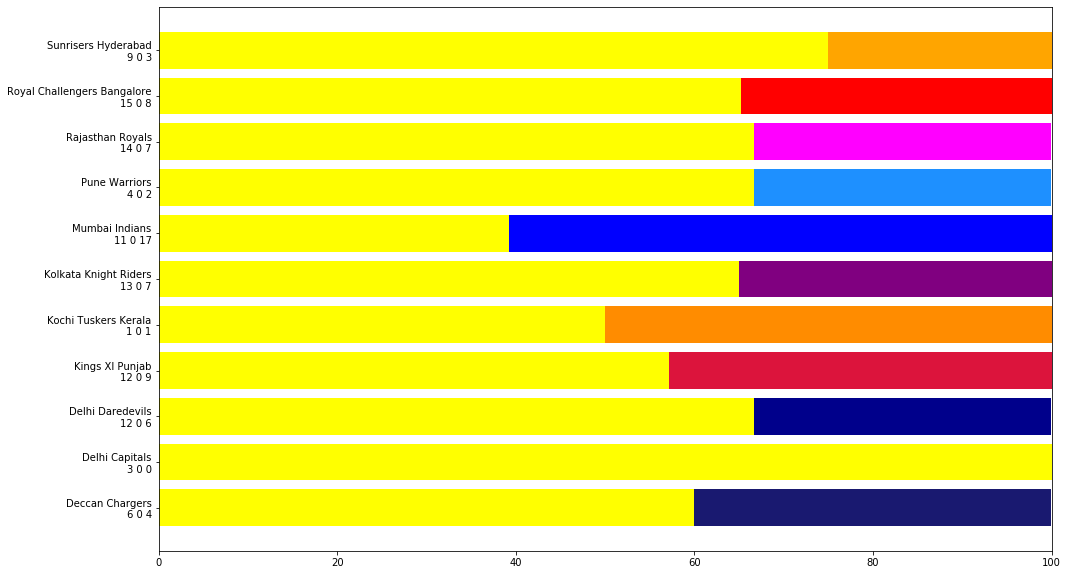

In [22]:
head_to_head('Chennai Super Kings')

In [23]:
#extras_team = dict()
def extras_team_year(df,df2,year):  
    df1 = pd.merge(df,df2,how='outer',left_on='match_id',right_on='id')
    return df1[df1['season']==i].groupby(by='bowling_team')[['wide_runs','bye_runs','legbye_runs','noball_runs','penalty_runs']].sum()
df1=extras_team_year(df,df2,'2017')
df1

,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs
bowling_team,,,,,


In [24]:
#Analysis- Average wickets taken per team over the years
def get_wickets(df, team):
    match_id = 0
    opponents = None
    num_wickets = 0
    wickets = dict()
    for i in range(len(df)):
        if df['bowling_team'][i] == team:
            if match_id == 0:
                match_id = df['match_id'][i]
                opponents = df['batting_team'][i]
            if match_id == df['match_id'][i]:
                if type(df['player_dismissed'][i]) != float:
                    num_wickets += 1
            else:
                if opponents in wickets:
                    wickets[opponents] += [num_wickets]
                else:
                    wickets[opponents] = [num_wickets]
                opponents = df['batting_team'][i]
                match_id = df['match_id'][i]
                num_wickets = 0
                if type(df['player_dismissed'][i]) != float:
                    num_wickets += 1
    for i in wickets:
        wickets[i] = round(np.average(wickets[i]),0)
    return wickets
        
output = dict()
for i in df['batting_team'].unique():
    row = get_wickets(df, i)
    output[i] = row

final_out = pd.DataFrame(output, index = list(df['batting_team'].unique()))
final_out

,Sunrisers Hyderabad,Royal Challengers Bangalore,Mumbai Indians,Rising Pune Supergiant,Gujarat Lions,Kolkata Knight Riders,Kings XI Punjab,Delhi Daredevils,Chennai Super Kings,Rajasthan Royals,Deccan Chargers,Kochi Tuskers Kerala,Pune Warriors,Rising Pune Supergiants,Delhi Capitals
Sunrisers Hyderabad,NaN,5.0,6.0,6.0,2.0,6.0,5.0,4.0,6.0,6.0,NaN,NaN,7.0,8.0,7.0
Royal Challengers Bangalore,6.0,NaN,6.0,9.0,5.0,5.0,6.0,5.0,7.0,6.0,6.0,2.0,4.0,3.0,8.0
Mumbai Indians,6.0,6.0,NaN,8.0,8.0,5.0,6.0,7.0,6.0,6.0,6.0,2.0,6.0,5.0,7.0
Rising Pune Supergiant,6.0,6.0,5.0,NaN,6.0,6.0,4.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gujarat Lions,8.0,7.0,6.0,6.0,NaN,5.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN
Kolkata Knight Riders,6.0,6.0,6.0,6.0,4.0,NaN,5.0,6.0,6.0,6.0,5.0,8.0,5.0,5.0,8.0
Kings XI Punjab,7.0,6.0,6.0,7.0,6.0,6.0,NaN,6.0,6.0,7.0,6.0,4.0,5.0,4.0,8.0
Delhi Daredevils,5.0,6.0,6.0,6.0,4.0,6.0,6.0,NaN,6.0,5.0,5.0,6.0,5.0,6.0,NaN
Chennai Super Kings,4.0,6.0,6.0,NaN,NaN,4.0,5.0,6.0,NaN,5.0,6.0,4.0,5.0,NaN,4.0
Rajasthan Royals,6.0,6.0,6.0,NaN,NaN,6.0,6.0,6.0,7.0,NaN,6.0,6.0,4.0,NaN,8.0


In [25]:
#Analysis- Average runs scored per team over the years
def get_runs(df, team):
    match_id = 0
    opponents = None
    runs = 0
    run_dict = dict()
    for i in range(len(df)):
        if df['batting_team'][i] == team:
            if match_id == 0:
                match_id = df['match_id'][i]
                opponents = df['bowling_team'][i]
            if match_id == df['match_id'][i]:
                if type(df['total_runs'][i]) != float:
                    runs += df['total_runs'][i]
            else:
                if opponents in run_dict:
                    run_dict[opponents] += [runs]
                else:
                    run_dict[opponents] = [runs]
                opponents = df['bowling_team'][i]
                match_id = df['match_id'][i]
                runs = 0
                if type(df['total_runs'][i]) != float:
                    runs += df['total_runs'][i]
    for i in run_dict:
        run_dict[i] = round(np.average(run_dict[i]),0)
    return run_dict

output = dict()
for i in df['batting_team'].unique():
    row = get_runs(df, i)
    output[i] = row

final_out = pd.DataFrame(output, index = list(df['batting_team'].unique()))
final_out

,Sunrisers Hyderabad,Royal Challengers Bangalore,Mumbai Indians,Rising Pune Supergiant,Gujarat Lions,Kolkata Knight Riders,Kings XI Punjab,Delhi Daredevils,Chennai Super Kings,Rajasthan Royals,Deccan Chargers,Kochi Tuskers Kerala,Pune Warriors,Rising Pune Supergiants,Delhi Capitals
Sunrisers Hyderabad,NaN,165.0,143.0,164.0,138.0,151.0,162.0,156.0,176.0,145.0,NaN,NaN,106.0,114.0,156.0
Royal Challengers Bangalore,179.0,NaN,168.0,159.0,154.0,165.0,156.0,163.0,155.0,138.0,158.0,143.0,156.0,182.0,178.0
Mumbai Indians,148.0,160.0,NaN,170.0,164.0,149.0,169.0,145.0,157.0,160.0,138.0,184.0,126.0,142.0,178.0
Rising Pune Supergiant,156.0,115.0,153.0,NaN,166.0,170.0,118.0,186.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gujarat Lions,145.0,187.0,164.0,169.0,NaN,163.0,173.0,183.0,NaN,NaN,NaN,NaN,NaN,179.0,NaN
Kolkata Knight Riders,158.0,151.0,158.0,170.0,165.0,NaN,160.0,149.0,153.0,152.0,144.0,144.0,128.0,132.0,191.0
Kings XI Punjab,168.0,162.0,163.0,120.0,162.0,164.0,NaN,140.0,171.0,168.0,169.0,178.0,133.0,152.0,170.0
Delhi Daredevils,149.0,156.0,165.0,134.0,181.0,151.0,139.0,NaN,163.0,157.0,163.0,130.0,168.0,121.0,NaN
Chennai Super Kings,168.0,147.0,161.0,NaN,NaN,150.0,163.0,146.0,NaN,156.0,141.0,135.0,142.0,NaN,126.0
Rajasthan Royals,152.0,142.0,161.0,NaN,NaN,148.0,165.0,149.0,166.0,NaN,159.0,104.0,144.0,NaN,160.0


In [26]:
# Toss Analysis- Win percentage on winning toss for each venue counted over groups, grouped by toss decision  
def toss_win(df, venue):
    match_count = field_count = field_winner_count = bat_count = bat_winner_count = 0
    for i in range(len(df)):
        if df['venue'][i] == venue:
            if df['toss_decision'][i] == 'field':
                field_count += 1
                if df['toss_winner'][i] == df['winner'][i]:
                    field_winner_count += 1
            if df['toss_decision'][i] == 'bat':
                bat_count += 1
                if df['toss_winner'][i] == df['winner'][i]:
                    bat_winner_count += 1
    try:
        field_winner_prob = round(field_winner_count/field_count, 2)
    except:
        field_winner_prob = np.nan
        
    try:
        bat_winner_prob = round(bat_winner_count/bat_count, 2)
    except:
        bat_winner_prob = np.nan
    return({'bat': bat_winner_prob, 'field' : field_winner_prob})

venues = dict()
for i in df2['venue'].unique():
    venues[i] = toss_win(df2, i)
pd.DataFrame(venues).T

,bat,field
"Rajiv Gandhi International Stadium, Uppal",0.21,0.42
Maharashtra Cricket Association Stadium,0.59,0.62
Saurashtra Cricket Association Stadium,0.00,0.57
Holkar Cricket Stadium,0.00,0.88
M Chinnaswamy Stadium,0.44,0.55
Wankhede Stadium,0.50,0.51
Eden Gardens,0.43,0.63
Feroz Shah Kotla,0.47,0.55
"Punjab Cricket Association IS Bindra Stadium, Mohali",0.35,0.54
Green Park,NaN,1.00


In [27]:
def get_batting_records(df):
    batsmen = {}
    match=1
    for i in range(df.shape[0]):
      if df.iloc[i,6] not in batsmen.keys():
        batsmen[df.iloc[i,6]]={'temp':0, 'temp2':0, 'Runs':0, 'Balls':0, 'Fifties':0, 'Hundreds':0, 'Fours':0, 'Sixes':0, 'Dismissals':0, 'caught':0, 'bowled':0, 'run out':0, 'lbw':0, 'caught and bowled':0, 'stumped':0, 'retired hurt':0, 'hit wicket':0, 'obstructing the field':0, 'Innings':0}
      batsmen[df.iloc[i,6]]['Runs']+=df.iloc[i,15]
      batsmen[df.iloc[i,6]]['temp']+=df.iloc[i,15]
      if df.iloc[i,15]==4:
        batsmen[df.iloc[i,6]]['Fours']+=1
      if df.iloc[i,15]==6:
        batsmen[df.iloc[i,6]]['Sixes']+=1

      if df.iloc[i,10]==0 and df.iloc[i,13]==0:
        batsmen[df.iloc[i,6]]['Balls']+=1
      else:
        if df.iloc[i,15]>0 and i+1<df.shape[0] and df.iloc[i,5] != df.iloc[i+1,5]:
          batsmen[df.iloc[i,6]]['Balls']+=1
      if df.iloc[i,13]>0 and i+1<df.shape[0] and df.iloc[i,5] != df.iloc[i+1,5]:
        batsmen[df.iloc[i,6]]['Balls']+=2
      elif df.iloc[i,13]>0 and i+1<df.shape[0] and df.iloc[i,5] == df.iloc[i+1,5]:
        batsmen[df.iloc[i,6]]['Balls']+=1

      if df.iloc[i,6]==df.iloc[i,18]:
        batsmen[df.iloc[i,6]]['Dismissals']+=1
        batsmen[df.iloc[i,6]][df.iloc[i,19]]+=1

      if df.iloc[i,0] != batsmen[df.iloc[i,6]]['temp2']:
        if batsmen[df.iloc[i,6]]['temp']>=100:
          batsmen[df.iloc[i,6]]['Hundreds']+=1
        elif batsmen[df.iloc[i,6]]['temp']>=50:
          batsmen[df.iloc[i,6]]['Fifties']+=1
        batsmen[df.iloc[i,6]]['temp']=0
        batsmen[df.iloc[i,6]]['temp2'] = df.iloc[i,0]
        batsmen[df.iloc[i,6]]['Innings']+=1
        match=df.iloc[i,0]

    for name in batsmen.keys():
      batsmen[name]['Strike Rate']=(100 * batsmen[name]['Runs'] / batsmen[name]['Balls'])
      if batsmen[name]['Dismissals']>0:
        batsmen[name]['Average']=(batsmen[name]['Runs'] / batsmen[name]['Dismissals'])

    batting_records = pd.DataFrame(batsmen)
    batting_records = batting_records.T
    batting_records.drop(["temp", "temp2"], axis=1, inplace=True)
    batting_records.loc[batting_records.Average.isna() == True , "Average"] = batting_records.Runs / batting_records.Innings
    return batting_records

batting_records = get_batting_records(df)

In [28]:
batting_records

,Runs,Balls,Fifties,Hundreds,Fours,Sixes,Dismissals,caught,bowled,run out,lbw,caught and bowled,stumped,retired hurt,hit wicket,obstructing the field,Innings,Strike Rate,Average
DA Warner,4741.0,3345.0,44.0,3.0,459.0,181.0,108.0,69.0,23.0,4.0,4.0,2.0,5.0,0.0,1.0,0.0,126.0,141.733931,43.898148
S Dhawan,4632.0,3714.0,34.0,0.0,526.0,96.0,131.0,79.0,28.0,8.0,8.0,2.0,5.0,1.0,0.0,0.0,158.0,124.717286,35.358779
MC Henriques,969.0,760.0,5.0,0.0,87.0,27.0,34.0,20.0,4.0,1.0,2.0,3.0,4.0,0.0,0.0,0.0,50.0,127.500000,28.500000
Yuvraj Singh,2765.0,2143.0,14.0,0.0,218.0,149.0,107.0,84.0,10.0,2.0,5.0,2.0,3.0,0.0,1.0,0.0,126.0,129.024732,25.841121
DJ Hooda,535.0,426.0,1.0,0.0,27.0,24.0,32.0,20.0,6.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,45.0,125.586854,16.718750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A Turner,4.0,11.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,36.363636,1.333333
H Brar,22.0,14.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,157.142857,22.000000
S Rutherford,82.0,55.0,0.0,0.0,4.0,7.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,149.090909,16.400000
P Raj,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000


<BarContainer object of 3 artists>

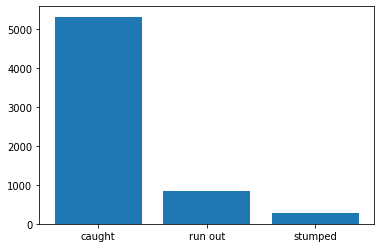

In [29]:
kind=df.groupby('dismissal_kind').count()
t=dict(kind["fielder"][kind.fielder!=0])
plt.bar(t.keys(),t.values())

<BarContainer object of 10 artists>

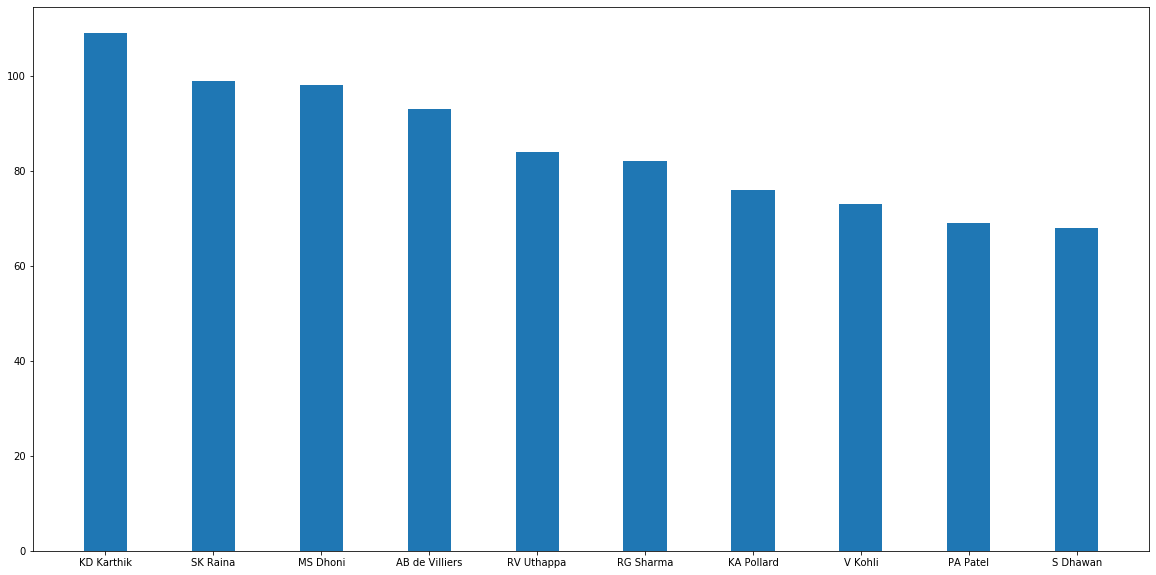

In [30]:
catch=df[df.dismissal_kind=="caught"].groupby("fielder").count()
f=catch.sort_values(by=["match_id"],ascending=False).head(10)
f1=dict(f["match_id"])
plt.figure(figsize=(20,10))
plt.bar(f1.keys(),f1.values(),width=0.4)

<BarContainer object of 10 artists>

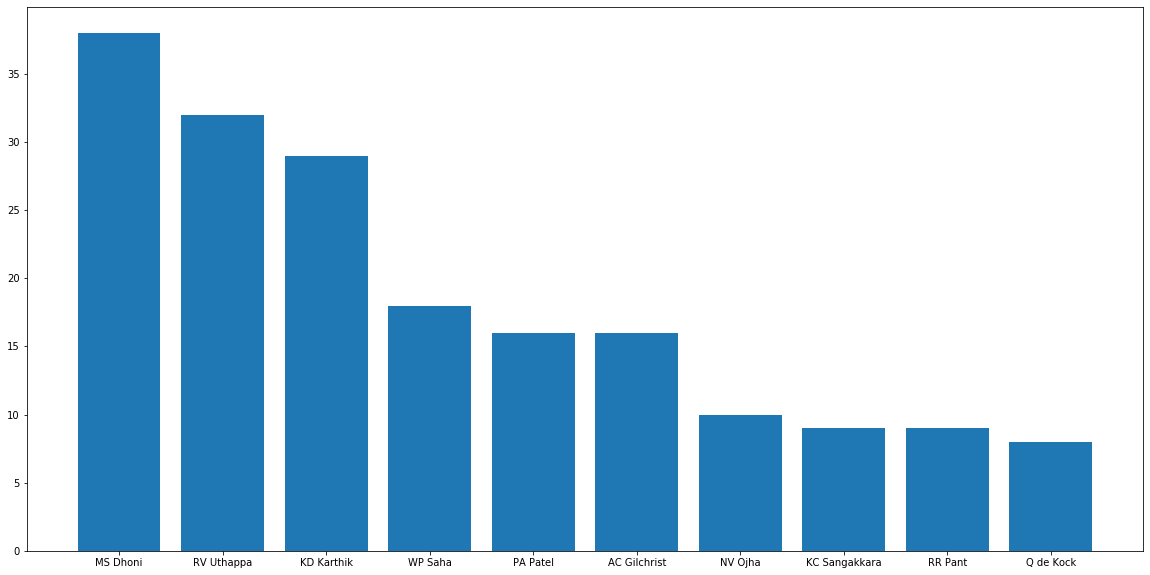

In [31]:
stump=df[df.dismissal_kind=="stumped"].groupby("fielder").count()
s=stump.sort_values(by=["match_id"],ascending=False).head(10)
s1=dict(s["match_id"])
plt.figure(figsize=(20,10))
plt.bar(s1.keys(),s1.values())

In [32]:
def get_bowling_records(df):   
    bowler = {}
    match=1
    for i in range(df.shape[0]):
      if df.iloc[i,8] not in bowler.keys():
        bowler[df.iloc[i,8]]={'temp':0, 'temp2':0, 'temp3':0, 'temp4':0, 'Runs':0, 'Balls':0, 'Wickets':0, '4+':0, '5+':0, 'Dots':0, 'Maidens':0, 'Wides':0, 'No balls':0, 'caught':0, 'bowled':0, 'lbw':0, 'caught and bowled':0, 'stumped':0, 'hit wicket':0, 'Innings':0}
      bowler[df.iloc[i,8]]['Runs']+=(df.iloc[i,15]+df.iloc[i,10]+df.iloc[i,13])
      bowler[df.iloc[i,8]]['Wides']+=df.iloc[i,10]
      bowler[df.iloc[i,8]]['No balls']+=df.iloc[i,13]
      if df.iloc[i,17] == 0:
        bowler[df.iloc[i,8]]['Dots']+=1
        bowler[df.iloc[i,8]]['temp4']+=1
      else:
        bowler[df.iloc[i,8]]['temp4']=-200

      if df.iloc[i,10]==0 and df.iloc[i,13]==0:
        bowler[df.iloc[i,8]]['Balls']+=1
      else:
        if df.iloc[i,15]>0 and i+1<df.shape[0] and df.iloc[i,5] != df.iloc[i+1,5]:
          bowler[df.iloc[i,8]]['Balls']+=1
      if df.iloc[i,13]>0 and i+1<df.shape[0] and df.iloc[i,5] != df.iloc[i+1,5]:
        bowler[df.iloc[i,8]]['Balls']+=2
      elif df.iloc[i,13]>0 and i+1<df.shape[0] and df.iloc[i,5] == df.iloc[i+1,5]:
        bowler[df.iloc[i,8]]['Balls']+=1

      if df.iloc[i,19] in ['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket']:
        bowler[df.iloc[i,8]]['Wickets']+=1
        bowler[df.iloc[i,8]]['temp']+=1
        bowler[df.iloc[i,8]][df.iloc[i,19]]+=1

      if bowler[df.iloc[i,8]]['temp2'] == df.iloc[i,0] and bowler[df.iloc[i,8]]['temp3'] != df.iloc[i,4]:
        if bowler[df.iloc[i,8]]['temp4']==6:
          bowler[df.iloc[i,8]]['Maidens']+=1
        bowler[df.iloc[i,8]]['temp4']=0
        bowler[df.iloc[i,8]]['temp3']=df.iloc[i,4]

      if bowler[df.iloc[i,8]]['temp2'] != df.iloc[i,0]:
        if bowler[df.iloc[i,8]]['temp']>=5:
          bowler[df.iloc[i,8]]['5+']+=1
        elif bowler[df.iloc[i,8]]['temp']>=4:
          bowler[df.iloc[i,8]]['4+']+=1
        bowler[df.iloc[i,8]]['temp']=0
        bowler[df.iloc[i,8]]['temp2'] = df.iloc[i,0]
        bowler[df.iloc[i,8]]['temp3']=0
        bowler[df.iloc[i,8]]['temp4']=0
        bowler[df.iloc[i,8]]['Innings']+=1
        match=df.iloc[i,0]

    for name in bowler.keys():
      bowler[name]['Economy']=(6 * bowler[name]['Runs'] / bowler[name]['Balls'])
      if bowler[name]['Wickets']>0:
        bowler[name]['Strike_Rate']=(bowler[name]['Balls'] / bowler[name]['Wickets'])
        bowler[name]['Average']=(bowler[name]['Runs'] / bowler[name]['Wickets'])

    bowling_records = pd.DataFrame(bowler)
    bowling_records = bowling_records.T
    bowling_records.drop(["temp", "temp2", "temp3", "temp4"], axis=1, inplace=True)
    bowling_records.loc[bowling_records.Strike_Rate.isna() == True , "Strike_Rate"] = bowling_records.Balls
    bowling_records.loc[bowling_records.Average.isna() == True , "Average"] = 999
    return bowling_records

bowling_records = get_bowling_records(df)

In [33]:
bowling_records

,Runs,Balls,Wickets,4+,5+,Dots,Maidens,Wides,No balls,caught,bowled,lbw,caught and bowled,stumped,hit wicket,Innings,Economy,Strike_Rate,Average
TS Mills,153.0,107.0,5.0,0.0,0.0,41.0,0.0,9.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,5.0,8.579439,21.400000,30.600000
A Choudhary,144.0,103.0,5.0,0.0,0.0,42.0,0.0,6.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,8.388350,20.600000,28.800000
YS Chahal,2366.0,1827.0,100.0,2.0,0.0,639.0,0.0,60.0,6.0,63.0,19.0,5.0,1.0,12.0,0.0,83.0,7.770115,18.270000,23.660000
S Aravind,1039.0,762.0,45.0,2.0,0.0,290.0,1.0,31.0,1.0,32.0,8.0,2.0,3.0,0.0,0.0,38.0,8.181102,16.933333,23.088889
SR Watson,2691.0,2069.0,92.0,1.0,0.0,803.0,2.0,98.0,13.0,71.0,16.0,2.0,2.0,1.0,0.0,105.0,7.803770,22.489130,29.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H Brar,48.0,30.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,9.600000,30.000000,999.000000
P Raj,60.0,33.0,1.0,0.0,0.0,8.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,10.909091,33.000000,60.000000
O Thomas,88.0,67.0,5.0,0.0,0.0,17.0,0.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,7.880597,13.400000,17.600000
A Roy,14.0,15.0,1.0,0.0,0.0,4.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.600000,15.000000,14.000000


<BarContainer object of 10 artists>

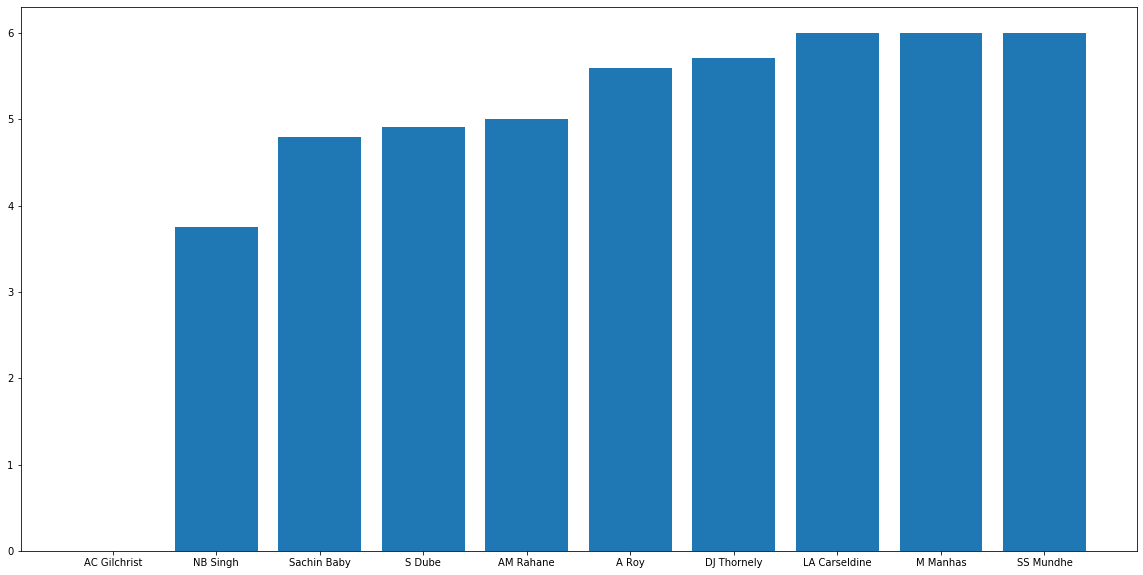

In [34]:
economy=bowling_records.sort_values(by=["Economy"]).head(10)
s1=dict(economy.Economy)
plt.figure(figsize=(20,10))
plt.bar(s1.keys(),s1.values())

In [35]:
'''
strike_rate=batting_records.sort_values(by=['Strike Rate'], ascending=True).head(10)
s2=dict(strike_rate['Strike Rate'])
plt.figure(figsize=(20,10))
plt.bar(s2.keys(),s2.values())
'''

"\nstrike_rate=batting_records.sort_values(by=['Strike Rate'], ascending=True).head(10)\ns2=dict(strike_rate['Strike Rate'])\nplt.figure(figsize=(20,10))\nplt.bar(s2.keys(),s2.values())\n"

In [36]:
latest_data=pd.merge(df, df2[df2.season>=2018], left_on='match_id', right_on='id', validate='many_to_one')
latest_data.drop(["umpire1","umpire2","umpire3","venue","dl_applied","player_of_match","win_by_wickets","win_by_runs","id"], axis=1, inplace=True)
latest_data.sort_values(by=['match_id', 'inning', 'over', 'ball'],ascending=False)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,fielder,season,city,date,team1,team2,toss_winner,toss_decision,result,winner
28617,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,NaN,2019,Hyderabad,2019-05-12,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Mumbai Indians
28616,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,NaN,2019,Hyderabad,2019-05-12,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Mumbai Indians
28615,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,KH Pandya,2019,Hyderabad,2019-05-12,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Mumbai Indians
28614,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,NaN,2019,Hyderabad,2019-05-12,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Mumbai Indians
28613,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,NaN,2019,Hyderabad,2019-05-12,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Mumbai Indians
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,7894,1,Mumbai Indians,Chennai Super Kings,1,5,RG Sharma,E Lewis,DL Chahar,0,...,NaN,2018,Mumbai,2018-04-07,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,Chennai Super Kings
3,7894,1,Mumbai Indians,Chennai Super Kings,1,4,RG Sharma,E Lewis,DL Chahar,0,...,NaN,2018,Mumbai,2018-04-07,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,Chennai Super Kings
2,7894,1,Mumbai Indians,Chennai Super Kings,1,3,RG Sharma,E Lewis,DL Chahar,0,...,NaN,2018,Mumbai,2018-04-07,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,Chennai Super Kings
1,7894,1,Mumbai Indians,Chennai Super Kings,1,2,RG Sharma,E Lewis,DL Chahar,0,...,NaN,2018,Mumbai,2018-04-07,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,Chennai Super Kings


<h2>BATSMAN RATING</h2>

In [37]:
latest_batting_records = get_batting_records(latest_data)

In [38]:
def get_overall_batting_score(batting_records):    
    df = pd.DataFrame(batting_records["Innings"]).rename(columns = {"Innings" : "matches"})
    df["matches"] = min_max_scaler.fit_transform(df[["matches"]])
    df["achievement_weight"] = 20 * batting_records["Hundreds"] + 10 * batting_records["Fifties"] + 3 * batting_records["Sixes"] + batting_records["Fours"]
    df["stat_score"] = df["achievement_weight"]*0.3 + batting_records["Average"]*0.55 + batting_records["Strike Rate"]*0.15
    df["overall_score"] = df["stat_score"] * df["matches"]
    return df.sort_values(by=["overall_score", "matches", "achievement_weight", "stat_score"])

In [39]:
def get_batsman_rating(batting_records, latest_batting_records):
    overall_score = get_overall_batting_score(batting_records)
    latest_score = get_overall_batting_score(latest_batting_records)
    batsman_rating = pd.merge(overall_score[["overall_score"]], latest_score[["overall_score"]], how="outer", left_index=True, right_index=True, suffixes=["_career", "_latest"]).fillna(0)
    batsman_rating["batsman_rating"] = 0.4*batsman_rating["overall_score_career"] + 0.6*batsman_rating["overall_score_latest"]
    batsman_rating["batsman_rating"] = min_max_scaler.fit_transform(batsman_rating[["batsman_rating"]]) * 100
    return batsman_rating[["batsman_rating"]].sort_values(by=["batsman_rating"], ascending=False)

In [40]:
batsman_rating = get_batsman_rating(batting_records, latest_batting_records)
batsman_rating

,batsman_rating
SK Raina,100.000000
V Kohli,95.546684
RG Sharma,85.973005
CH Gayle,85.805574
MS Dhoni,83.395706
...,...
Abdur Razzak,0.000000
H Brar,0.000000
C Nanda,0.000000
S Tyagi,0.000000


<h2>BOWLER RATING</h2>

In [41]:
latest_bowling_records = get_bowling_records(latest_data)

In [42]:
def get_overall_bowling_score(bowling_records):    
    df = pd.DataFrame(bowling_records["Innings"]).rename(columns = {"Innings" : "matches"})
    df["matches"] = min_max_scaler.fit_transform(df[["matches"]])
    df["achievement_weight"] = 5 * bowling_records["Maidens"] + bowling_records["Dots"]
    df["wicket_weight"] = 30 * bowling_records["5+"] + 20 * bowling_records["4+"] + 10 * bowling_records["Wickets"]
    df["stat_score"] = bowling_records["Average"] + bowling_records["Economy"] + 1 / (1+df["achievement_weight"])
    df["overall_score"] = (df["wicket_weight"] * df["matches"]) / df["stat_score"]
    return df.sort_values(by=["overall_score", "matches", "achievement_weight", "stat_score"])

In [43]:
def get_bowler_rating(bowling_records, latest_bowling_records):
    overall_score = get_overall_bowling_score(bowling_records)
    max_overall = overall_score["overall_score"].max()
    overall_score["overall_score"] = overall_score["overall_score"] / max_overall
    latest_score = get_overall_bowling_score(latest_bowling_records)
    max_latest = latest_score["overall_score"].max()
    latest_score["overall_score"] = latest_score["overall_score"] / max_latest
    bowler_rating = pd.merge(overall_score[["overall_score"]], latest_score[["overall_score"]], how="outer", left_index=True, right_index=True, suffixes=["_career", "_latest"]).fillna(0)
    bowler_rating["bowler_rating"] = 0.35*bowler_rating["overall_score_career"] + 0.65*bowler_rating["overall_score_latest"]
    bowler_rating["bowler_rating"] = min_max_scaler.fit_transform(bowler_rating[["bowler_rating"]]) * 100
    return bowler_rating[["bowler_rating"]].sort_values(by=["bowler_rating"], ascending=False)

In [44]:
bowler_rating = get_bowler_rating(bowling_records, latest_bowling_records)
bowler_rating

,bowler_rating
Rashid Khan,100.000000
JJ Bumrah,93.357948
RA Jadeja,81.674093
Harbhajan Singh,79.861995
A Mishra,79.323012
...,...
SS Mundhe,0.000000
SS Agarwal,0.000000
SR Tendulkar,0.000000
SPD Smith,0.000000


<h2> PLAYING 11 SELECTION USING DISTANCES </h2>

In [45]:
given_team = ["SP Narine", "A Mishra", "DJ Bravo", "RA Jadeja", \
              "SL Malinga", "CH Gayle", "AB de Villiers", "MS Dhoni", \
              "SK Raina", "V Kohli", "S Gopal", "Yuvraj Singh", "PP Ojha", \
             "MP Stoinis", "DA Miller"]
given_team = pd.DataFrame(data={"Players": given_team})

In [46]:
def select_playing_11_euclidian(given_team, batsman_rating, bowler_rating):
    temp = pd.merge(given_team, batsman_rating, left_on="Players", right_index=True)
    temp = pd.merge(temp, bowler_rating, left_on="Players", right_index=True, how="left").fillna(0).reset_index(drop=True)
    top_3_bowlers = temp.sort_values(by=["bowler_rating", "batsman_rating"], ascending=False).head(3)
    top_3_batsman = temp.sort_values(by=["batsman_rating", "bowler_rating"], ascending=False).head(3)
    selected_team = pd.concat([top_3_batsman, top_3_bowlers]).reset_index(drop=True)
    temp2 = temp.apply(lambda x: temp.loc[~x.isin(selected_team[x.name]),x.name]).fillna(0)
    euclid_distance = dict()
    for i in temp2.index:
        dist = ((100 - temp2.batsman_rating[i])**2 + (100 - temp2.bowler_rating[i])**2)**0.5
        euclid_distance[temp2["Players"][i]] = dist
    rest_5 = pd.DataFrame((list(euclid_distance.items()))).rename(columns = {0:"Players", 1:"Euclid_Distance"}).sort_values(by=["Euclid_Distance"])[["Players"]].head(5)
    selected_team = pd.concat([selected_team[["Players"]], rest_5]).reset_index(drop=True)
    selected_team = pd.merge(temp, selected_team, how="right")
    return selected_team

In [47]:
select_playing_11_euclidian(given_team, batsman_rating, bowler_rating)

,Players,batsman_rating,bowler_rating
0,SP Narine,20.635550,74.252936
1,A Mishra,2.241545,79.323012
2,DJ Bravo,18.009862,71.519727
3,RA Jadeja,19.106095,81.674093
4,SL Malinga,0.380898,64.601210
5,CH Gayle,85.805574,0.821980
6,AB de Villiers,80.892032,0.000000
7,MS Dhoni,83.395706,0.000000
8,SK Raina,100.000000,1.987405
9,V Kohli,95.546684,0.060746


In [48]:
def select_playing_11_city_block(given_team, batsman_rating, bowler_rating):
    temp = pd.merge(given_team, batsman_rating, left_on="Players", right_index=True)
    temp = pd.merge(temp, bowler_rating, left_on="Players", right_index=True, how="left").fillna(0).reset_index(drop=True)
    top_3_bowlers = temp.sort_values(by=["bowler_rating", "batsman_rating"], ascending=False).head(3)
    top_3_batsman = temp.sort_values(by=["batsman_rating", "bowler_rating"], ascending=False).head(3)
    selected_team = pd.concat([top_3_batsman, top_3_bowlers]).reset_index(drop=True)
    temp2 = temp.apply(lambda x: temp.loc[~x.isin(selected_team[x.name]),x.name]).fillna(0)
    city_block = dict()
    for i in temp2.index:
        dist = abs(100 - temp2.batsman_rating[i]) + abs(100 - temp2.bowler_rating[i])
        city_block[temp2["Players"][i]] = dist
    rest_5 = pd.DataFrame((list(city_block.items()))).rename(columns = {0:"Players", 1:"city_block_distance"}).sort_values(by=["city_block_distance"])[["Players"]].head(5)
    selected_team = pd.concat([selected_team[["Players"]], rest_5])
    selected_team = pd.merge(temp, selected_team, how="right")
    return selected_team.sort_values(by="batsman_rating", ascending=False).reset_index(drop=True)

In [49]:
select_playing_11_city_block(given_team, batsman_rating, bowler_rating)

,Players,batsman_rating,bowler_rating
0,SK Raina,100.000000,1.987405
1,V Kohli,95.546684,0.060746
2,CH Gayle,85.805574,0.821980
3,MS Dhoni,83.395706,0.000000
4,AB de Villiers,80.892032,0.000000
5,SP Narine,20.635550,74.252936
6,RA Jadeja,19.106095,81.674093
7,DJ Bravo,18.009862,71.519727
8,S Gopal,2.872895,70.881631
9,A Mishra,2.241545,79.323012


In [50]:
def select_playing_11_cosine(given_team, batsman_rating, bowler_rating):
    temp = pd.merge(given_team, batsman_rating, left_on="Players", right_index=True)
    temp = pd.merge(temp, bowler_rating, left_on="Players", right_index=True, how="left").fillna(0).reset_index(drop=True)
    top_3_bowlers = temp.sort_values(by=["bowler_rating", "batsman_rating"], ascending=False).head(3)
    top_3_batsman = temp.sort_values(by=["batsman_rating", "bowler_rating"], ascending=False).head(3)
    selected_team = pd.concat([top_3_batsman, top_3_bowlers]).reset_index(drop=True)
    temp2 = temp.apply(lambda x: temp.loc[~x.isin(selected_team[x.name]),x.name]).fillna(0)
    cosine_dist = dict()
    for i in temp2.index:
        bat = temp2.batsman_rating[i]
        bowl = temp2.bowler_rating[i]
        similarity = (100*bat + 100*bowl)/(((100**2 + bat**2)**0.5) * ((100**2 + bowl**2)**0.5))
        cosine_dist[temp2["Players"][i]] = 1 - similarity
    rest_5 = pd.DataFrame((list(cosine_dist.items()))).rename(columns = {0:"Players", 1:"Euclid_Distance"}).sort_values(by=["Euclid_Distance"])[["Players"]].head(5)
    selected_team = pd.concat([selected_team[["Players"]], rest_5])
    selected_team = pd.merge(temp, selected_team, how="right")
    return selected_team.sort_values(by="batsman_rating", ascending=False).reset_index(drop=True)

In [51]:
select_playing_11_cosine(given_team, batsman_rating, bowler_rating)

,Players,batsman_rating,bowler_rating
0,SK Raina,100.000000,1.987405
1,V Kohli,95.546684,0.060746
2,CH Gayle,85.805574,0.821980
3,MS Dhoni,83.395706,0.000000
4,AB de Villiers,80.892032,0.000000
5,SP Narine,20.635550,74.252936
6,RA Jadeja,19.106095,81.674093
7,DJ Bravo,18.009862,71.519727
8,S Gopal,2.872895,70.881631
9,A Mishra,2.241545,79.323012


In [52]:
def select_playing_11_chebychev(given_team, batsman_rating, bowler_rating):
    temp = pd.merge(given_team, batsman_rating, left_on="Players", right_index=True)
    temp = pd.merge(temp, bowler_rating, left_on="Players", right_index=True, how="left").fillna(0).reset_index(drop=True)
    top_3_bowlers = temp.sort_values(by=["bowler_rating", "batsman_rating"], ascending=False).head(3)
    top_3_batsman = temp.sort_values(by=["batsman_rating", "bowler_rating"], ascending=False).head(3)
    selected_team = pd.concat([top_3_batsman, top_3_bowlers]).reset_index(drop=True)
    temp2 = temp.apply(lambda x: temp.loc[~x.isin(selected_team[x.name]),x.name]).fillna(0)
    chebychev_dist = dict()
    for i in temp2.index:
        bat = temp2.batsman_rating[i]
        bowl = temp2.bowler_rating[i]
        chebychev_dist[temp2["Players"][i]] = max(abs(100-bat), abs(100-bowl))
    rest_5 = pd.DataFrame((list(chebychev_dist.items()))).rename(columns = {0:"Players", 1:"chebychev_dist"}).sort_values(by=["chebychev_dist"])[["Players"]].head(5)
    selected_team = pd.concat([selected_team[["Players"]], rest_5])
    selected_team = pd.merge(temp, selected_team, how="right")
    return selected_team.sort_values(by="batsman_rating", ascending=False).reset_index(drop=True)

In [53]:
select_playing_11_chebychev(given_team, batsman_rating, bowler_rating)

,Players,batsman_rating,bowler_rating
0,SK Raina,100.000000,1.987405
1,V Kohli,95.546684,0.060746
2,CH Gayle,85.805574,0.821980
3,Yuvraj Singh,31.416723,4.695564
4,SP Narine,20.635550,74.252936
5,RA Jadeja,19.106095,81.674093
6,DJ Bravo,18.009862,71.519727
7,MP Stoinis,8.454313,2.554853
8,S Gopal,2.872895,70.881631
9,A Mishra,2.241545,79.323012


<h2> TOSS DECISION </h2>

In [54]:
def bat_or_field(match_data, team1, team2, venue):
    toss_decision = df2[["team1", "team2", "toss_winner", "toss_decision", "winner", "venue"]]
    toss_decision = toss_decision[(toss_decision["team1"] == team1) | (toss_decision["team2"] == team1)]
    toss_decision_1 = toss_decision[(toss_decision["team1"] == team2) | (toss_decision["team2"] == team2)]
    toss_decision_1 = toss_decision_1[toss_decision_1["toss_winner"] == team1]
    toss_decision_1 = toss_decision_1[toss_decision_1["venue"] == venue]
    toss_decision_2 = toss_decision[toss_decision["toss_winner"] == team1]
    toss_decision_2 = toss_decision_2[toss_decision_2["venue"] == venue]
    toss_decision_2 = toss_decision_2[toss_decision_2["winner"] == team1]
    
    try:
        bat_1 = toss_decision_1.groupby(["toss_decision", "winner"]).size()["bat"][team1]
    except:
        bat_1 = 0
    try:
        field_1 = toss_decision_1.groupby(["toss_decision", "winner"]).size()["field"][team1]
    except:
        field_1 = 0

    try:
        bat_2 = toss_decision_2.groupby(["toss_decision", "winner"]).size()["bat"][team1]
    except:
        bat_2 = 0
    try:
        field_2 = toss_decision_2.groupby(["toss_decision", "winner"]).size()["field"][team1]
    except:
        field_2 = 0
    bat = 0.6 * bat_1 + 0.4 * bat_2
    field = 0.6 * field_1 + 0.4 * field_2
    if bat > field:
        print("Bat")
    else:
        print("Field")

In [55]:
team1 = "Royal Challengers Bangalore"
team2 = "Sunrisers Hyderabad"
venue = "M Chinnaswamy Stadium"
bat_or_field(df2, team1, team2, venue)

Field


<h2> FINAL TEAM SELECTION</h2>

In [56]:
def get_stadium_bias(data, venue):
    bat = 0
    bowl = 0
    count = 0
    for i in range(len(data)):
        if data["venue"][i] == venue:
            count += 1
            if data["winner"][i] == data["team1"][i]:
                bat += data["batsman_count_1"][i]
                bowl += data["bowler_count_1"][i]
            else:
                bat += data["batsman_count_2"][i]
                bowl += data["bowler_count_2"][i]
    return (round(bowl/count), round(bat/count))
get_stadium_bias(new_data, 'M Chinnaswamy Stadium')

(6.0, 5.0)

In [57]:
def latest_team_selecter(given_team, batsman_rating, bowler_rating, data, player_details, venue):
    #finding nationality of each player
    team_details = list()
    for i in range(len(given_team)):
        for j in range(len(player_details)):
            if set(player_details['shortName'][j]).issuperset(given_team['Players'][i]) or set(given_team['Players'][i]).issuperset(player_details['shortName'][j]):
                team_details.append({'Players': given_team['Players'][i], 'Nationality': player_details['nationality'][j]})
                break
    team_deatils = pd.DataFrame(team_details)
    
    #merging details, batting and bowling rankings
    temp = pd.merge(team_deatils, batsman_rating, left_on="Players", right_index=True)
    temp = pd.merge(temp, bowler_rating, left_on="Players", right_index=True, how="left").fillna(0).reset_index(drop=True)
    
    #selecting top 6 players(top 3 each)
    top_3_bowlers = temp.sort_values(by=["bowler_rating", "batsman_rating"], ascending=False).head(3)
    top_3_batsman = temp.sort_values(by=["batsman_rating", "bowler_rating"], ascending=False).head(3)
    selected_team = pd.concat([top_3_batsman, top_3_bowlers]).reset_index(drop=True)
    
    #seeing who's not selected yet
    temp2 = temp.merge(selected_team.drop_duplicates(), on=['Players', 'Nationality', 'batsman_rating', 'bowler_rating'], how='left', indicator=True)
    temp2 = temp2[temp2['_merge'] == 'left_only'].drop(columns='_merge')
    
    #checking if we should have more bowlers than batsmen
    bowler_bias, batsman_bias = get_stadium_bias(new_data, venue)
    bowlers = 3 if bowler_bias > batsman_bias else 2
    batsmen = 3 if bowler_bias < batsman_bias else 2
    
    #accodingly select the remaining 5 players
    remaining_bowlers = temp2.sort_values(by="bowler_rating", ascending=False).head(int(bowlers))
    remaining_batsmen = temp2.sort_values(by="batsman_rating", ascending=False).head(int(batsmen))
    selected_team = pd.merge(selected_team, remaining_batsmen, how="outer")
    selected_team = pd.merge(selected_team, remaining_bowlers, how="outer")
    selected_team = selected_team.sort_values(by="batsman_rating", ascending=False).reset_index(drop=True)
    
    return selected_team

In [58]:
latest_team_selecter(given_team, batsman_rating, bowler_rating, new_data, player_details, venue="M Chinnaswamy Stadium")

,Players,Nationality,batsman_rating,bowler_rating
0,SK Raina,Indian,100.000000,1.987405
1,V Kohli,Indian,95.546684,0.060746
2,CH Gayle,West Indian,85.805574,0.821980
3,MS Dhoni,Indian,83.395706,0.000000
4,AB de Villiers,South African,80.892032,0.000000
5,SP Narine,West Indian,20.635550,74.252936
6,RA Jadeja,Indian,19.106095,81.674093
7,DJ Bravo,West Indian,18.009862,71.519727
8,S Gopal,Indian,2.872895,70.881631
9,A Mishra,Indian,2.241545,79.323012


In [59]:
def final_team_selecter(given_team, batsman_rating, bowler_rating, new_data, player_details, venue):
    team_details = list()
    for i in range(len(given_team)):
        for j in range(len(player_details)):
            if set(player_details['shortName'][j]).issuperset(given_team['Players'][i]) or set(given_team['Players'][i]).issuperset(player_details['shortName'][j]):
                team_details.append({'Players': given_team['Players'][i], 'Nationality': player_details['nationality'][j]})
                break
    team_deatils = pd.DataFrame(team_details)

    #merging details, batting and bowling rankings
    temp = pd.merge(team_deatils, batsman_rating, left_on="Players", right_index=True)
    temp = pd.merge(temp, bowler_rating, left_on="Players", right_index=True, how="left").fillna(0).reset_index(drop=True)

    #selecting top 6 players(top 3 each)
    top_3_bowlers = temp.sort_values(by=["bowler_rating", "batsman_rating"], ascending=False).head(3)
    top_3_batsman = temp.sort_values(by=["batsman_rating", "bowler_rating"], ascending=False).head(3)
    selected_team = pd.concat([top_3_batsman, top_3_bowlers]).reset_index(drop=True)

    #seeing who's not selected yet
    temp2 = temp.merge(selected_team.drop_duplicates(), on=['Players', 'Nationality', 'batsman_rating', 'bowler_rating'], how='left', indicator=True)
    temp2 = temp2[temp2['_merge'] == 'left_only'].drop(columns='_merge')

    #using the euclidian distacnce from perfect player to see all rounders
    euclid_distance =list()
    for i in temp2.index:
        dist = ((100 - temp2.batsman_rating[i])**2 + (100 - temp2.bowler_rating[i])**2)**0.5
        euclid_distance.append({"Players" : temp2["Players"][i], \
                                "Nationality" : temp2["Nationality"][i], \
                               "batsman_rating": temp2["batsman_rating"][i], \
                               "bowler_rating": temp2["bowler_rating"][i], \
                               "euclid_distance": dist})
    euclid_distance = pd.DataFrame(euclid_distance)

    #checking if we should have more bowlers than batsmen
    bowler_bias, batsman_bias = get_stadium_bias(new_data, venue)
    if bowler_bias >= 7:
        bowlers = 4
        batsmen = 1
    elif batsman_bias >= 7:
        bowlers = 1
        batsmen = 4
    else:
        bowlers = bowler_bias - 3
        batsmen = batsman_bias - 3

    #choosing top 3 all rounders with high bowler/batsman rating respectively
    remaining_bowlers = euclid_distance.query("bowler_rating > batsman_rating").sort_values(by="euclid_distance").head(int(bowlers))
    remaining_batsmen = euclid_distance.query("bowler_rating < batsman_rating").sort_values(by="euclid_distance").head(int(batsmen))
    selected_team = pd.merge(selected_team, remaining_batsmen, how="outer")
    selected_team = pd.merge(selected_team, remaining_bowlers, how="outer")
    selected_team = selected_team.sort_values(by="batsman_rating", ascending=False).reset_index(drop=True)
    return selected_team[["Players", "Nationality", "batsman_rating", "bowler_rating"]]

In [60]:
final_team_selecter(given_team, batsman_rating, bowler_rating, new_data, player_details, venue="M Chinnaswamy Stadium")

,Players,Nationality,batsman_rating,bowler_rating
0,SK Raina,Indian,100.000000,1.987405
1,V Kohli,Indian,95.546684,0.060746
2,CH Gayle,West Indian,85.805574,0.821980
3,MS Dhoni,Indian,83.395706,0.000000
4,AB de Villiers,South African,80.892032,0.000000
5,SP Narine,West Indian,20.635550,74.252936
6,RA Jadeja,Indian,19.106095,81.674093
7,DJ Bravo,West Indian,18.009862,71.519727
8,S Gopal,Indian,2.872895,70.881631
9,A Mishra,Indian,2.241545,79.323012
